This analysis delves into the study about the article relationships based on authorship similarities within a specific time frame around the emergence of COVID-19. We are looking at articles from April and May 2019 for data before COVID-19 and from one year later, April and May 2020, for data after the COVID-19 global outbreak. The dataset focuses on articles published by The New York Times, serving as a temporal case study to understand media focus shifts during a significant global event.

**Network Composition:**
- **Nodes:** Articles
- **Edges:** Relationships based on common authors

**Network Type:**
The dataset forms an Undirected Unweighted Networks, where each edge signifies a shared authorship between two articles.

**Data Structure:**
Each network structured with nodes representing individual articles identified by their URLs, and edges reflecting the authorship connection.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

**Loading the networks and printing basic details about each of them**

In [ ]:
# Load the graph
G_author_pre = nx.read_adjlist("/content/drive/MyDrive/author_network_pre.txt")

# Compute network statistics
N = len(G_author_pre)
L = G_author_pre.size()
degrees_author_pre = [G_author_pre.degree[node] for node in G_author_pre]
kmin = np.min(degrees_author_pre)
kmax = np.max(degrees_author_pre)
kavg = np.mean(degrees_author_pre)

print("Author Network Pre-COVID details:")
print("N =", N)
print("L =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Author Network Pre-COVID details:
N = 9260
L = 64715
Average degree = 13.977321814254859
Min degree = 0
Max degree = 140


In [ ]:
# Load the graph
G_author_post = nx.read_adjlist("/content/drive/MyDrive/author_network_post.txt")

# Compute network statistics
N = len(G_author_post)
L = G_author_post.size()
degrees_author_post = [G_author_post.degree[node] for node in G_author_post]
kmin = np.min(degrees_author_post)
kmax = np.max(degrees_author_post)
kavg = np.mean(degrees_author_post)

print("Author Network Post-COVID details:")
print("N =", N)
print("L =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Author Network Post-COVID details:
N = 9366
L = 59181
Average degree = 12.637411915438822
Min degree = 0
Max degree = 122


Initially, the pre-COVID authorship network for The New York Times articles contained 9,260 nodes and 64,715 edges, with an average degree of connectivity at 13.97. This configuration suggests a moderately interconnected network of articles based on shared authorship, reflecting the collaboration patterns among authors prior to the global pandemic. In contrast, the post-COVID network saw a slight increase to 9,366 nodes but experienced a decrease in edges to 59,181, with the average degree of connectivity dropping to 12.64. This shift indicates a subtle expansion in the number of articles while highlighting a reduction in shared authorship connections, suggesting a diversification in author assignments and possibly a broadening of topics covered in response to the pandemic. The decrease in the maximum degree from 140 to 122 further emphasizes fewer central hubs of intensely shared authorship, which could reflect a strategic editorial shift to involve a broader spectrum of journalistic voices and perspectives during the crisis. These changes underscore how significant global events like the COVID-19 pandemic can influence journalistic collaboration and content production, leading to notable transformations in the structure and connectivity of media authorship networks.

**Calculating the connected components and isolated nodes**


In [ ]:
# Compute connected components and the size of the largest one
isolated_nodes_pre = list(nx.isolates(G_author_pre))
print("Number of isolated nodes in author pre-COVID network:", len(isolated_nodes_pre))
connected_components_author_pre = list(nx.connected_components(G_author_pre))
largest_component_author_pre = max(connected_components_author_pre, key=len)
G_author_lcc_pre = G_author_pre.subgraph(largest_component_author_pre)
size_of_largest_component_author_pre = len(largest_component_author_pre)
print("Number of connected components in author pre-COVID network:", len(connected_components_author_pre))
print("Size of Largest Connected Component in author pre-COVID network:", size_of_largest_component_author_pre)

Number of isolated nodes in author pre-COVID network: 2283
Number of connected components in author pre-COVID network: 2736
Size of Largest Connected Component in author pre-COVID network: 3336


In [ ]:
# Compute connected components and the size of the largest one
isolated_nodes_post = list(nx.isolates(G_author_post))
print("Number of isolated nodes in author post-COVID network:", len(isolated_nodes_post))
connected_components_author_post = list(nx.connected_components(G_author_post))
largest_component_author_post = max(connected_components_author_post, key=len)
G_author_lcc_post = G_author_post.subgraph(largest_component_author_post)
size_of_largest_component_author_post = len(largest_component_author_post)
print("Number of connected components in author post-COVID network:", len(connected_components_author_post))
print("Size of Largest Connected Component in author post-COVID network:", size_of_largest_component_author_post)

Number of isolated nodes in author post-COVID network: 2433
Number of connected components in author post-COVID network: 2965
Size of Largest Connected Component in author post-COVID network: 3497


The increase in both the number of isolated nodes and the total number of connected components in the post-COVID network highlights the dual nature of the pandemic's impact on journalistic practices at The New York Times. On one hand, the increase in isolated articles suggests a broadening of the scope to include a wide array of topics, necessitating individual reporting efforts possibly due to specialization requirements or social distancing measures affecting traditional newsroom collaborations. On the other hand, the growth in the number of connected components and the slight increase in the size of the largest component reflect a continued, if not strengthened, collaborative effort on major pandemic-related themes, underscoring the critical role of teamwork in covering multifaceted issues.

**Calculating the diameter**

In [ ]:
diameter_author_pre = nx.diameter(G_author_lcc_pre)
print("Diameter of the largest connected component in author pre-COVID network:", diameter_author_pre)

Diameter of the largest connected component in author pre-COVID network: 17


In [ ]:
diameter_author_post = nx.diameter(G_author_lcc_post)
print("Diameter of the largest connected component in author post-COVID network:", diameter_author_post)

Diameter of the largest connected component in author post-COVID network: 13


The decrease in the network diameter from 17 to 13 in the post-COVID period suggests a tighter clustering of discussion topics within the largest connected component of The New York Times authorship network. This reduction in diameter indicates that the coverage may have become more streamlined or focused, likely due to a centralization of news around pivotal issues directly related to or stemming from the pandemic. Such a change suggests that the Times strategically narrowed its discussions to fewer, more interconnected themes, facilitating quicker and more coherent communication across related articles, and possibly reflecting an editorial emphasis on providing more concentrated and comprehensive coverage of the most critical aspects of the pandemic.

**Calculating Shortest Paths**


In [ ]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 10

# Identify the top N highest degree nodes
top_nodes = sorted(G_author_pre.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ids = [node[0] for node in top_nodes]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs = {}

# Calculate shortest paths between hubs (ignoring edge weights)
for source in top_node_ids:
    for target in top_node_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_author_pre, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs.items():
    print(f"Length of shortest path from node {pair[0]} to node {pair[1]}: {len(path)}")

Length of shortest path from node https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html to node https://www.nytimes.com/2019/04/08/us/politics/randolph-alles-secret-service.html: 2
Length of shortest path from node https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html to node https://www.nytimes.com/2019/04/17/us/politics/trump-mueller-report.html: 2
Length of shortest path from node https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html to node https://www.nytimes.com/2019/05/02/us/politics/carl-kline-security-clearance.html: 2
Length of shortest path from node https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html to node https://www.nytimes.com/2019/05/20/us/politics/trump-hunter-biden-china.html: 2
Length of shortest path from node https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html to node https://www.nytimes.com/2019/05/02/business/stephen-moore-fed.html: 2
Length of shortest path from node 

In [ ]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 10

# Identify the top N highest degree nodes
top_nodes = sorted(G_author_post.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ids = [node[0] for node in top_nodes]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs = {}

# Calculate shortest paths between hubs (ignoring edge weights)
for source in top_node_ids:
    for target in top_node_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_author_post, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs.items():
    print(f"Length of shortest path from node {pair[0]} to node {pair[1]}: {len(path)}")

Length of shortest path from node https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html to node https://www.nytimes.com/2020/04/11/us/politics/coronavirus-trump-response.html: 4
Length of shortest path from node https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html to node https://www.nytimes.com/2020/04/03/us/trump-inspector-general-intelligence-fired.html: 4
Length of shortest path from node https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html to node https://www.nytimes.com/2020/05/15/us/politics/president-trump-coronavirus-pandemic-response.html: 4
Length of shortest path from node https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html to node https://www.nytimes.com/article/hydroxychloroquine-coronavirus.html: 3
Length of shortest path from node https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html to node ht

The consistency of the shortest path length being predominantly 2 in the pre-COVID network suggests a tightly interconnected network where articles are closely linked through shared authorship, reflecting a cohesive and focused editorial structure. In contrast, the increased variability in path lengths in the post-COVID network, ranging from 2 to 5, suggests a more complex and expanded network structure. This indicates a diversification in topics and authorship connections, likely driven by the multifaceted nature of the pandemic and its wide-ranging impacts on different areas of news coverage. This shift reflects how the New York Times adapted its reporting to cover a broader array of interconnected issues, necessitating longer and more varied pathways between key articles and their authors.

**Average Clustering Coefficient**

In [ ]:
average_clustering_coefficient_author_pre = nx.average_clustering(G_author_pre)
print("Average Clustering Coefficient in pre-COVID network:", average_clustering_coefficient_author_pre)
edge_density_author_pre = nx.density(G_author_pre)
print("Edge Density in pre-COVID network:", edge_density_author_pre)

Average Clustering Coefficient in pre-COVID network: 0.677004052018074
Edge Density in pre-COVID network: 0.001509593024544212


In [ ]:
average_clustering_coefficient_author_post = nx.average_clustering(G_author_post)
print("Average Clustering Coefficient in post-COVID network:", average_clustering_coefficient_author_post)
edge_density_author_post = nx.density(G_author_post)
print("Edge Density in post-COVID network:", edge_density_author_post)

Average Clustering Coefficient in post-COVID network: 0.6478306717110681
Edge Density in post-COVID network: 0.0013494299963095378


The slight decrease in the average clustering coefficient from the pre-COVID to the post-COVID network (from 0.677 to 0.648) suggests a small reduction in the likelihood that two connected articles share a common author. This minor change indicates that while the general clustering of articles around common authors has decreased, the network remains relatively cohesive. The reduction in edge density from 0.0016 to 0.0013 reflects a lower overall connectivity relative to possible connections in the network. This could be interpreted as a diversification in the authorship across articles, potentially due to an expansion in the number of topics covered and a broader array of journalists contributing to coverage, driven by the wide-ranging impacts of the pandemic.

**Degree Distribution**

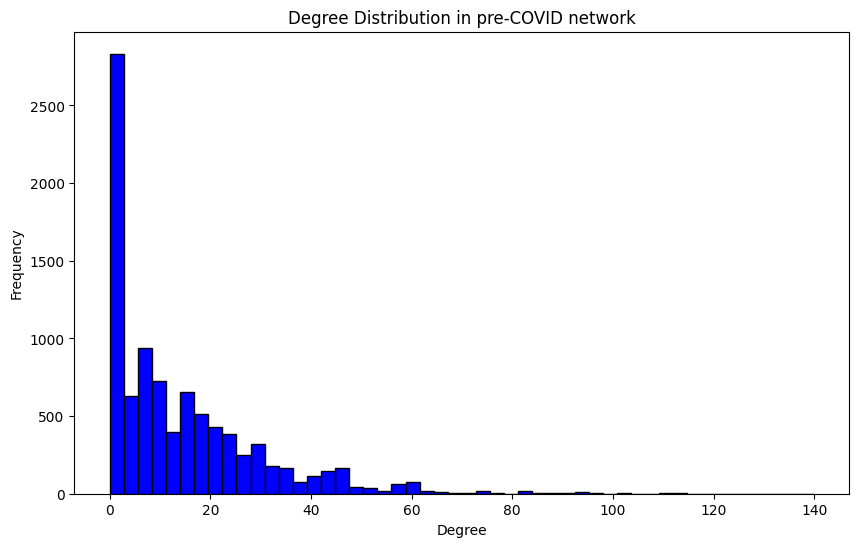

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees_author_pre, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in pre-COVID network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
plt.close()

# Calculate degree frequencies
degree_sequence_author_pre = sorted([d for n, d in G_author_pre.degree()], reverse=True)
degree_count_author_pre = Counter(degree_sequence_author_pre)
deg, cnt = zip(*degree_count_author_pre.items())

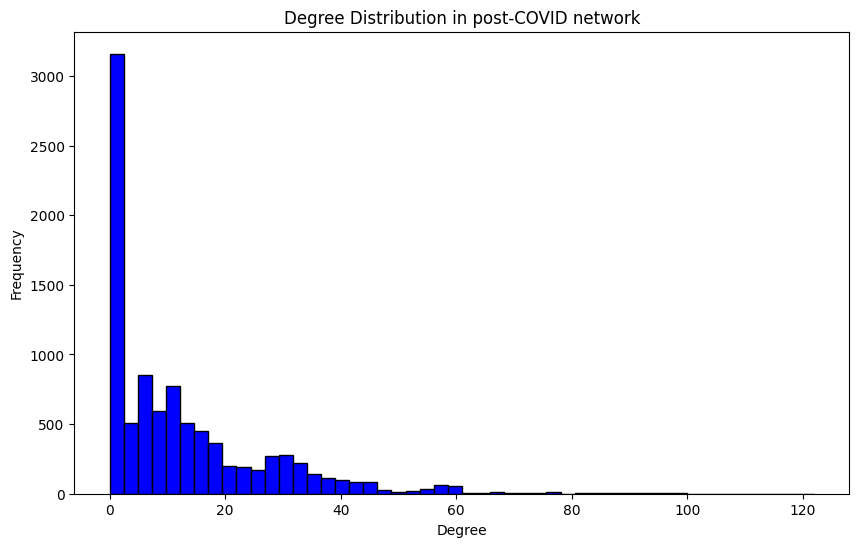

In [ ]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees_author_post, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in post-COVID network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

# Calculate degree frequencies
degree_sequence_author_post = sorted([d for n, d in G_author_post.degree()], reverse=True)
degree_count_author_post = Counter(degree_sequence_author_post)
deg, cnt = zip(*degree_count_author_post.items())

The degree distributions for the New York Times' authorship networks, both pre-COVID and post-COVID, predominantly exhibit characteristics typical of scale-free networks. These distributions are marked by a high frequency of nodes (articles) with a low degree and a long tail for nodes with higher degrees, suggesting that while most articles are linked through a few common authors, there are significant hubs in the network where certain articles share many authors. This pattern remains consistent before and after the onset of COVID-19, indicating that the fundamental structural organization of collaborations within the network did not dramatically change due to the pandemic. The presence of scale-free characteristics in both distributions implies a robust framework where new nodes (or articles) are likely to attach to already well-connected nodes (or highly collaborative authors), reinforcing the centrality of certain topics or areas of expertise within the newspaper’s coverage.

**Clustering Coefficient Distribution**

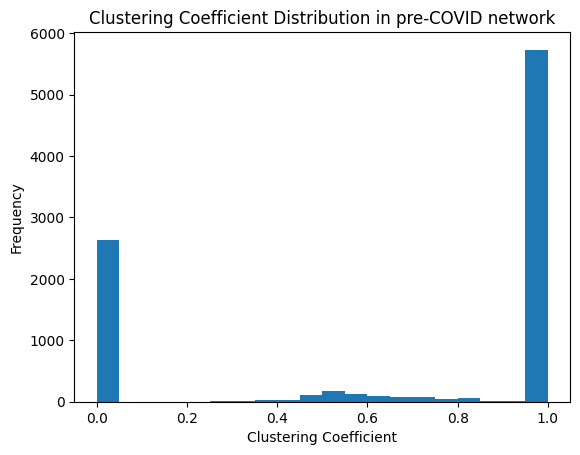

In [ ]:
# Clustering coefficient distribution
clustering_coefficients_author_pre = nx.clustering(G_author_pre)
plt.hist(clustering_coefficients_author_pre.values(), bins=20)
plt.title("Clustering Coefficient Distribution in pre-COVID network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

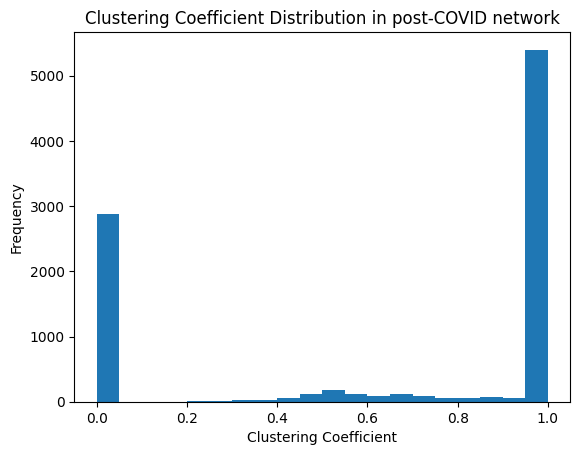

In [ ]:
# Clustering coefficient distribution
clustering_coefficients_author_post = nx.clustering(G_author_post)
plt.hist(clustering_coefficients_author_post.values(), bins=20)
plt.title("Clustering Coefficient Distribution in post-COVID network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

The clustering coefficient distributions in the New York Times' authorship networks, both before and after the COVID-19 pandemic, display a remarkably similar structure, emphasizing stability in the network's local connectivity over time. In both the pre-COVID and post-COVID networks, a significant majority of the nodes exhibit a clustering coefficient of nearly 1.0, indicating a high propensity for articles to form tightly knit clusters. This suggests that articles sharing authors tend to also share authors with each other, creating highly interconnected groups of articles. The presence of such strong clustering is indicative of robust collaborative practices within the network, where groups of articles are not only linked through common authors but are also likely to be thematically cohesive. This strong clustering may facilitate deeper exploration and consistent reporting on specific topics by leveraging the collective expertise of closely connected authors. The minimal change in the clustering distribution from pre-COVID to post-COVID suggests that the newspaper maintained its collaborative and thematic structures even as the news landscape shifted dramatically due to the pandemic, underscoring the adaptability and resilience of its editorial and reporting strategies.

**Betweenness Centrality Distribution**

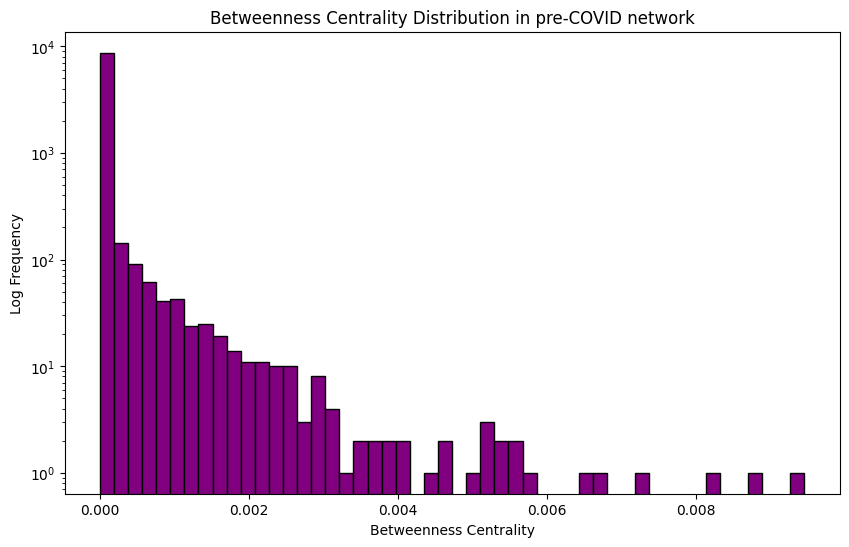

In [ ]:
# Calculate the betweenness centrality for each node
bet_centrality_author_pre = nx.betweenness_centrality(G_author_pre)
values = list(bet_centrality_author_pre.values())

# Plot the distribution of betweenness centrality values
plt.figure(figsize=(10, 6))
# Plot with a log scale on the y-axis
plt.hist(values, bins=50, log=True, color='purple', edgecolor='black')
plt.title('Betweenness Centrality Distribution in pre-COVID network')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Log Frequency')
plt.show()

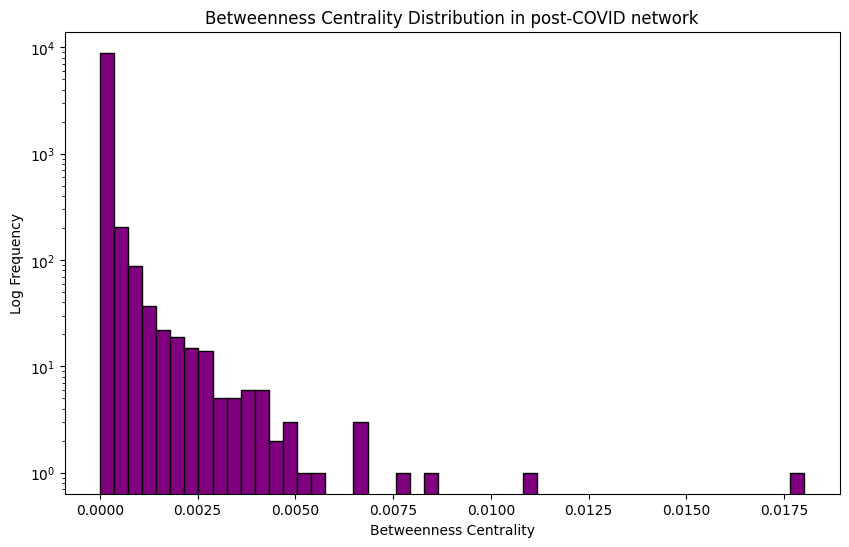

In [ ]:
# Calculate the betweenness centrality for each node
bet_centrality_author_post = nx.betweenness_centrality(G_author_post)
values = list(bet_centrality_author_post.values())

# Plot the distribution of betweenness centrality values
plt.figure(figsize=(10, 6))
# Plot with a log scale on the y-axis
plt.hist(values, bins=50, log=True, color='purple', edgecolor='black')
plt.title('Betweenness Centrality Distribution in post-COVID network')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Log Frequency')
plt.show()

The betweenness centrality distributions in the New York Times' authorship networks for both pre-COVID and post-COVID scenarios follow a similar pattern, marked by a majority of nodes having relatively low betweenness centrality and a few nodes showing high centrality. This distribution suggests that while most articles are not crucial for connecting other articles, there are key articles that act as significant bridges within the network. These nodes likely represent articles that share authors with a wide range of other articles, suggesting they cover pivotal or broadly relevant topics that span various aspects of the newspaper’s coverage. The consistency in the distribution shape before and after the onset of COVID-19 indicates that the role of key articles as central connectors remained stable despite the changing news environment. Such stability in network structure underscores the news organization's resilience and ability to maintain a coherent and interconnected narrative framework, even as the specifics of the global discourse shifted dramatically with the pandemic.

**Connected Components Size Distribution**

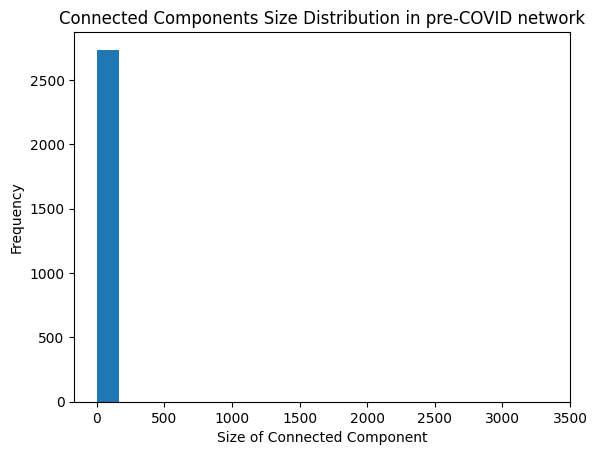

In [ ]:
# Connected components size distribution
connected_components_author_pre = sorted(nx.connected_components(G_author_pre), key=len, reverse=True)
component_sizes_author_pre = [len(component) for component in connected_components_author_pre]
plt.hist(component_sizes_author_pre, bins=20)
plt.title("Connected Components Size Distribution in pre-COVID network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

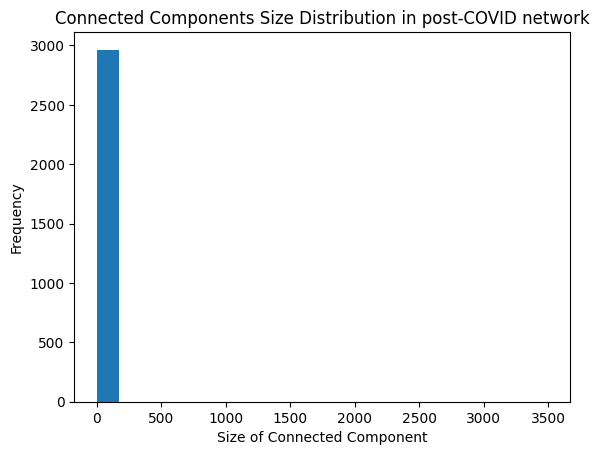

In [ ]:
# Connected components size distribution
connected_components_author_post = sorted(nx.connected_components(G_author_post), key=len, reverse=True)
component_sizes_author_post = [len(component) for component in connected_components_author_post]
plt.hist(component_sizes_author_post, bins=20)
plt.title("Connected Components Size Distribution in post-COVID network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

The connected components size distribution in both the pre-COVID and post-COVID networks exhibits a dominant component that encompasses the vast majority of nodes, leaving very few in smaller components. This large component likely indicates a highly interconnected cluster where a substantial proportion of articles share common authors, suggesting dense collaboration or topic focus among authors during both periods. The similar distribution across both periods highlights that the overall structural connectivity did not significantly change due to the pandemic, maintaining a robust main cluster that underscores the interconnectedness of discussions within the network. This could imply that despite the emergence of COVID-19, the network's core interaction patterns among authors or topics remained largely stable.

In [ ]:
import requests

API_KEY = "xdf9HSiXK8510t7HU1bVdpF2R36I0UQ4"
BASE_URL = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

def fetch_article_authors(url):
    params = {
        'fq': f'web_url:("{url}")',
        'api-key': API_KEY
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()

    if data['response']['docs']:
        doc = data['response']['docs'][0]
        byline = doc.get('byline', {})
        authors = [person['firstname'] + ' ' + (person['lastname'] if person['lastname'] is not None else '') for person in byline.get('person', [])]
        return authors
    else:
        return []

**Degree Centrality** measures how many ties a node has to other nodes.

In [ ]:
sorted_degree_centrality = sorted(nx.degree_centrality(G_author_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by degree centrality in pre-COVID network:")
for url, centrality in sorted_degree_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 articles by degree centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html
Authors: Nicholas Fandos, Charlie Savage, Catie Edmondson, Maggie Haberman

URL: https://www.nytimes.com/2019/04/08/us/politics/randolph-alles-secret-service.html
Authors: Peter Baker, Maggie Haberman, Nicholas Fandos, Zolan Kanno-Youngs

URL: https://www.nytimes.com/2019/04/17/us/politics/trump-mueller-report.html
Authors: Mark Mazzetti, Maggie Haberman, Nicholas Fandos, Katie Benner

URL: https://www.nytimes.com/2019/05/02/us/politics/carl-kline-security-clearance.html
Authors: Katie Rogers, Maggie Haberman, Nicholas Fandos

URL: https://www.nytimes.com/2019/05/20/us/politics/trump-hunter-biden-china.html
Authors: Maggie Haberman, Annie Karni, Kenneth Vogel, Katie Benner



In [ ]:
sorted_degree_centrality = sorted(nx.degree_centrality(G_author_post).items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by degree centrality in post-COVID network:")
for url, centrality in sorted_degree_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 articles by degree centrality in post-COVID network:
URL: https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html
Authors: Jazmin Aguilera, Danielle Allentuck, Nancy Coleman, Rebecca Liebson, Devi Lockwood, Brittainy Newman, Amelia Nierenberg, Mariel Padilla, Aaron Randle, Andrea Salcedo, Tala Schlossberg, Haley Willis, Felicia Vasquez, Jake Nevins, David Yaffe-Bellany

URL: https://www.nytimes.com/2020/04/11/us/politics/coronavirus-trump-response.html
Authors: Eric Lipton, David Sanger, Maggie Haberman, Michael 

URL: https://www.nytimes.com/2020/04/03/us/trump-inspector-general-intelligence-fired.html
Authors: Maggie Haberman, Charlie Savage, Nicholas Fandos

URL: https://www.nytimes.com/2020/05/15/us/politics/president-trump-coronavirus-pandemic-response.html
Authors: Alexander Burns, Maggie Haberman, Jonathan Martin, Nick Corasaniti

URL: https://www.nytimes.com/article/hydroxychloroquine-coronavirus.html
Authors: Denise Grady, Katie Thomas, P

**Betweenness Centrality** captures nodes that serve as bridges between other nodes.

In [ ]:
sorted_betweenness_centrality = sorted(bet_centrality_author_pre.items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by betweenness centrality in pre-COVID network:")
for url, centrality in sorted_betweenness_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 articles by betweenness centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/02/sports/porzingis-rape-investigation-mavericks.html
Authors: Marc Stein, Kevin Draper

URL: https://www.nytimes.com/2019/05/05/us/politics/tiger-woods-trump-medal-of-freedom.html
Authors: Annie Karni, Kevin Draper

URL: https://www.nytimes.com/2019/05/10/world/asia/myanmar-reuters-aung-san-suu-kyi.html
Authors: Richard Paddock, Saw Nang, Edward Wong

URL: https://www.nytimes.com/2019/05/08/us/politics/iran-nuclear-deal.html
Authors: David Sanger, Edward Wong, Steven Erlanger, Eric Schmitt

URL: https://www.nytimes.com/2019/04/02/us/trump-puerto-rico.html
Authors: Annie Karni, Patricia Mazzei



In [ ]:
sorted_betweenness_centrality = sorted(bet_centrality_author_post.items(), key=lambda x: x[1], reverse=True)
print("Top 5 articles by betweenness centrality in post-COVID network:")
for url, centrality in sorted_betweenness_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 articles by betweenness centrality in post-COVID network:
URL: https://www.nytimes.com/interactive/2020/05/22/learning/moving-forward-fellows-2020.html
Authors: Jazmin Aguilera, Danielle Allentuck, Nancy Coleman, Rebecca Liebson, Devi Lockwood, Brittainy Newman, Amelia Nierenberg, Mariel Padilla, Aaron Randle, Andrea Salcedo, Tala Schlossberg, Haley Willis, Felicia Vasquez, Jake Nevins, David Yaffe-Bellany

URL: https://www.nytimes.com/2020/04/24/us/politics/trump-inject-disinfectant-bleach-coronavirus.html
Authors: Katie Rogers, Christine Hauser, Alan Yuhas, Maggie Haberman

URL: https://www.nytimes.com/2020/04/10/business/coronavirus-vaccine-nationalism.html
Authors: Peter Goodman, Katie Thomas, Sui-lee Wee, Jeffrey Gettleman

URL: https://www.nytimes.com/article/hydroxychloroquine-coronavirus.html
Authors: Denise Grady, Katie Thomas, Patrick Lyons, Neil Vigdor

URL: https://www.nytimes.com/2020/05/14/sports/football/giants-deandre-baker-robbery-nfl.html
Authors: Ken Belson, Je

**Closeness Centrality** indicates how close a node is to all other nodes.

In [ ]:
sorted_closeness_centrality = sorted(nx.closeness_centrality(G_author_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in pre-COVID network:")
for url, centrality in sorted_closeness_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 nodes by closeness centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/12/us/politics/trump-border.html
Authors: Maggie Haberman, Annie Karni, Eric Schmitt

URL: https://www.nytimes.com/2019/05/15/world/middleeast/iran-war-usa.html
Authors: Julian Barnes, Eric Schmitt, Nicholas Fandos, Edward Wong

URL: https://www.nytimes.com/2019/05/08/us/politics/iran-nuclear-deal.html
Authors: David Sanger, Edward Wong, Steven Erlanger, Eric Schmitt

URL: https://www.nytimes.com/2019/05/06/world/middleeast/muslim-brotherhood-trump.html
Authors: Eric Schmitt, Helene Cooper, Edward Wong, Charlie Savage

URL: https://www.nytimes.com/2019/05/06/world/middleeast/us-iran-iraq-troops-.html
Authors: David Sanger, Edward Wong, Eric Schmitt, Helene Cooper



In [ ]:
sorted_closeness_centrality = sorted(nx.closeness_centrality(G_author_post).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in post-COVID network:")
for url, centrality in sorted_closeness_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 nodes by closeness centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/02/us/politics/jared-kushner-coronavirus-trump.html
Authors: Peter Baker, Maggie Haberman, Zolan Kanno-Youngs, Noah Weiland

URL: https://www.nytimes.com/2020/04/03/us/politics/coronavirus-trump-3m-masks.html
Authors: Ana Swanson, Zolan Kanno-Youngs, Maggie Haberman

URL: https://www.nytimes.com/2020/04/03/us/politics/coronavirus-trump-medical-advisers.html
Authors: Peter Baker, Maggie Haberman, James Glanz

URL: https://www.nytimes.com/2020/04/24/us/politics/trump-inject-disinfectant-bleach-coronavirus.html
Authors: Katie Rogers, Christine Hauser, Alan Yuhas, Maggie Haberman

URL: https://www.nytimes.com/2020/04/06/us/politics/coronavirus-trump-malaria-drug.html
Authors: Peter Baker, Katie Rogers, David Enrich, Maggie Haberman



**Eigenvector Centrality** considers a node's connections to high-scoring nodes, emphasizing the influence of connected groups.

In [ ]:
sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(G_author_pre).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in pre-COVID network:")
for url, centrality in sorted_eigenvector_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 nodes by eigenvector centrality in pre-COVID network:
URL: https://www.nytimes.com/2019/04/08/us/politics/randolph-alles-secret-service.html
Authors: Peter Baker, Maggie Haberman, Nicholas Fandos, Zolan Kanno-Youngs

URL: https://www.nytimes.com/2019/05/07/us/politics/don-mcgahn-subpoena.html
Authors: Nicholas Fandos, Charlie Savage, Catie Edmondson, Maggie Haberman

URL: https://www.nytimes.com/2019/04/17/us/politics/trump-mueller-report.html
Authors: Mark Mazzetti, Maggie Haberman, Nicholas Fandos, Katie Benner

URL: https://www.nytimes.com/2019/05/02/us/politics/carl-kline-security-clearance.html
Authors: Katie Rogers, Maggie Haberman, Nicholas Fandos

URL: https://www.nytimes.com/2019/05/09/us/politics/donald-trump-jr-subpoena-senator-burr.html
Authors: Nicholas Fandos, Maggie Haberman, Alexander Burns



In [ ]:
sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(G_author_post, max_iter=200).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in post-COVID network:")
for url, centrality in sorted_eigenvector_centrality[:5]:
    authors = fetch_article_authors(url)
    print(f"URL: {url}")
    print(f"Authors: {', '.join(authors)}\n")

Top 5 nodes by eigenvector centrality in post-COVID network:
URL: https://www.nytimes.com/2020/04/10/arts/music/playlist-frank-ocean-charli-xcx-twenty-one-pilots.html
Authors: Jon Pareles, Jon Caramanica, Caryn Ganz, Giovanni Russonello

URL: https://www.nytimes.com/2020/04/03/arts/music/playlist-mavis-staples-dababy-1975.html
Authors: Jon Pareles, Jon Caramanica, Giovanni Russonello

URL: https://www.nytimes.com/2020/04/17/arts/music/playlist-bon-iver-playboi-carti.html
Authors: Jon Pareles, Jon Caramanica, Giovanni Russonello

URL: https://www.nytimes.com/2020/04/24/arts/music/playlist-rolling-stones-juice-wrld.html
Authors: Jon Pareles, Jon Caramanica, Giovanni Russonello

URL: https://www.nytimes.com/2020/05/01/arts/music/playlist-beyonce-megan-thee-stallion-oasis.html
Authors: Jon Pareles, Jon Caramanica, Giovanni Russonello



Before the pandemic, the centrality analysis shows that the authors who appeared most frequently at the center of the network were primarily those covering high-profile U.S. political events and figures. This included extensive reporting on the Trump administration and key political events leading up to the 2020 presidential election. Authors like Maggie Haberman and Nicholas Fandos, who frequently cover White House affairs and national security, dominated the centrality measures. This is reflected in their frequent involvement in articles with high centrality, indicating a strong focus on core political issues and personalities that were central to the national dialogue.

In the wake of the pandemic, there's a noticeable shift in the centrality landscape. Authors covering a broader range of topics, including health, policy responses to the pandemic, and its impacts on various sectors, rose to prominence. This shift suggests that the pandemic has broadened the narrative scope, necessitating expertise from fields beyond traditional political reporting. Authors like Jon Pareles, who primarily covers music, appearing high in eigenvector centrality post-COVID, illustrate this shift well. The interconnectedness of topics during the pandemic, where discussions about health seamlessly integrate with cultural and societal impacts, has elevated authors from diverse beats to positions of greater influence within the network.

**Visualization**

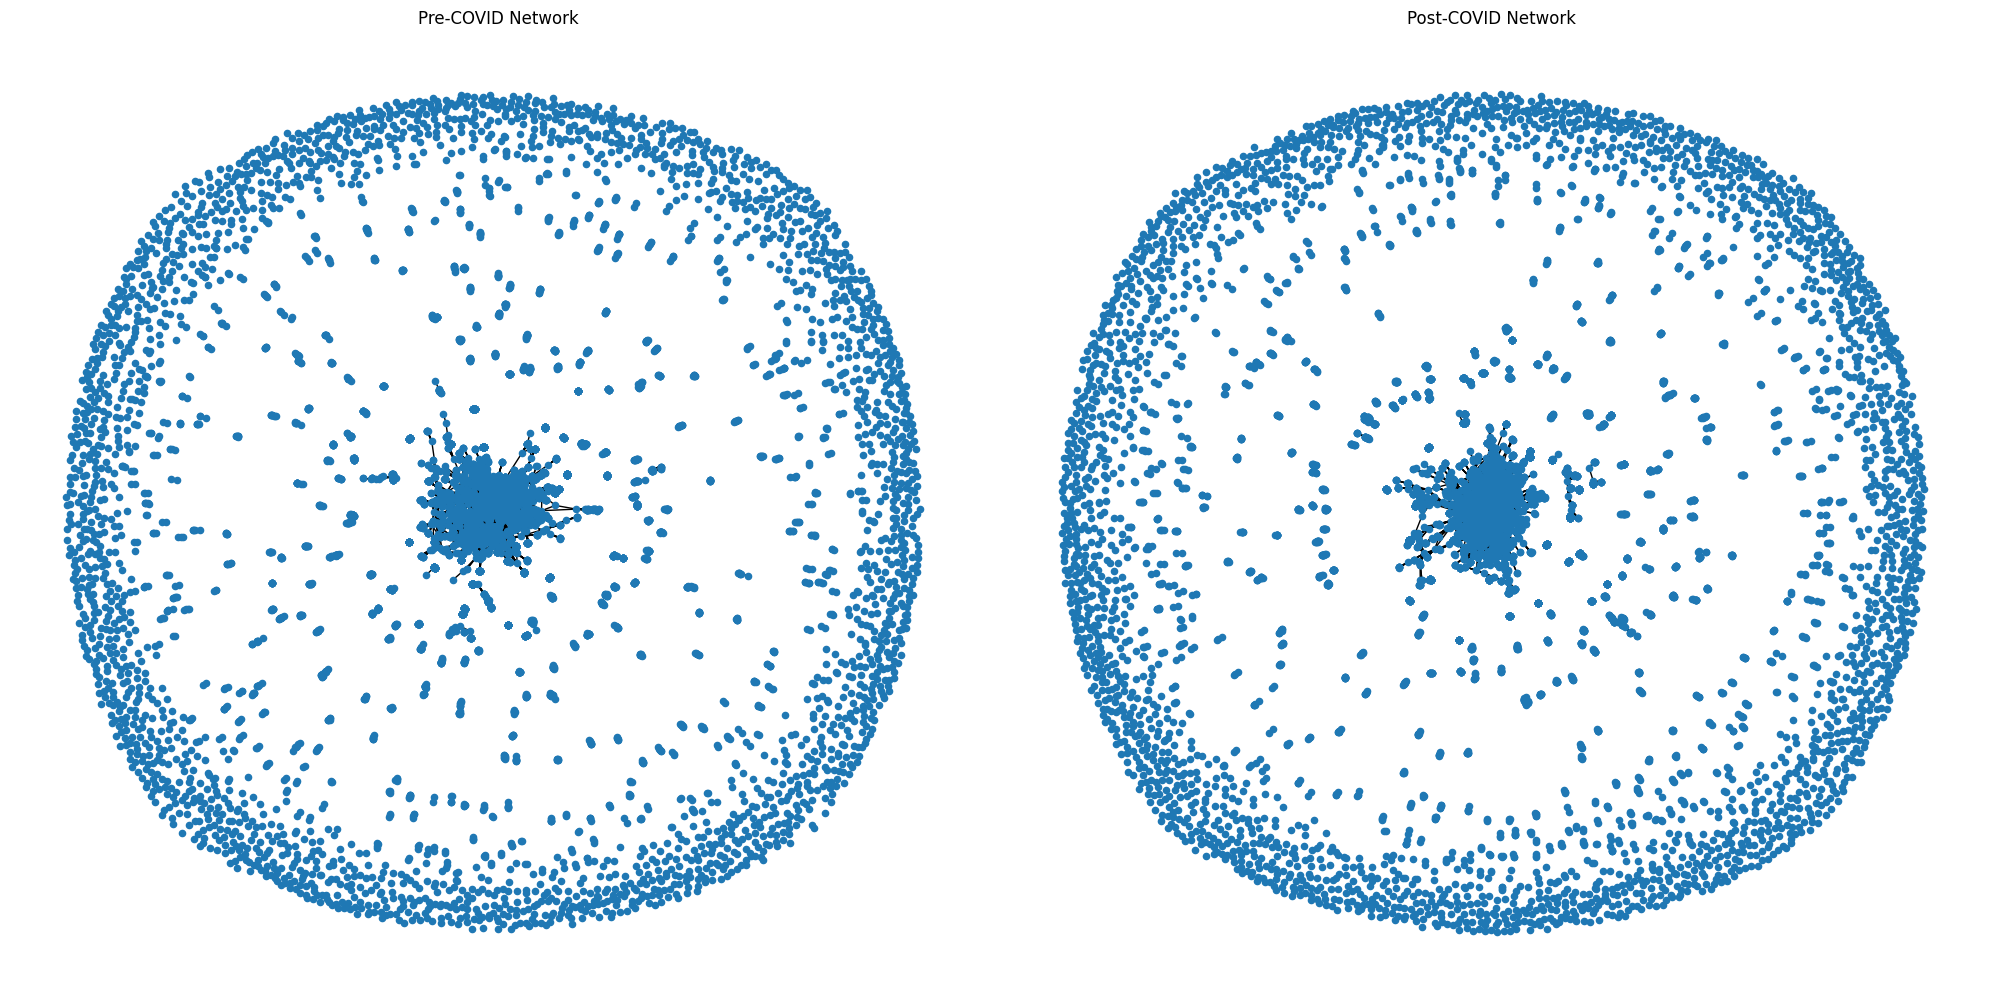

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
nx.draw_spring(G_author_pre, node_size=20, ax=axes[0])
axes[0].set_title('Pre-COVID Network')

nx.draw_spring(G_author_post, node_size=20, ax=axes[1])
axes[1].set_title('Post-COVID Network')

plt.tight_layout()
plt.show()